# Parse XML
- Get Top Bitscore / %ID value that corresponds to the MEGAN taxon assignment
- Collect stats about %hits to that taxon/genus and range of bit scores

In [265]:
from sklearn import manifold
from scipy.spatial import distance as dist

In [266]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time, datetime

In [267]:
#Enter File Locations and Name

#COI M2W
'''#XML Blast File
blast_file = "/Users/kpitz/Projects/MBON/processed/COI/M2W_COI/Analysis_20170706_0933_M2W_COI/all_lib/COI_m2w_twostep.xml"
print('Blast XML File: ','\n', blast_file)
#OTU_table_taxa_all.txt
otu_taxa_file = "/Users/kpitz/Projects/MBON/processed/COI/M2W_COI/Analysis_20170706_0933_M2W_COI/all_lib/OTU_table_taxa_all.txt"
print('OTU Table: ','\n', otu_taxa_file)
#Sample Metadata
metadata_file = "/Users/kpitz/Projects/MBON/Metadata/Merged_completed_Metadata_files/updated_dates/COI_MBCOI_M2W_metadata.csv"
print('Metadata: ','\n', metadata_file)
#Destination for Results
dest_loc='/Users/kpitz/Documents/'
print('Analysis Results saved in: ', dest_loc)
#Analysis Name
analysis_name = 'COI_M2W'
print('Analysis Name: ', analysis_name)'''


#18S M2W
#XML Blast File
blast_file = "/Users/kpitz/Projects/MBON/processed/18S/M2W/Analysis_20170411_1046_NT/all_lib/M2W_18S_S.xml"
print('Blast XML File: ','\n', blast_file)
#OTU_table_taxa_all.txt
otu_taxa_file = "/Users/kpitz/Projects/MBON/processed/18S/M2W/Analysis_20170411_1046_NT/all_lib/OTU_table_taxa_all.txt"
print('OTU Table: ', otu_taxa_file)
#Sample Metadata
metadata_file = "/Users/kpitz/Projects/MBON/metadata/Merged_completed_Metadata_files/18S_M2W_Metadata_061317_krw.csv"
print('Metadata: ', metadata_file)
#Destination for Results
dest_loc='/Users/kpitz/Documents/'
print('Analysis Results saved in: ', dest_loc)
#Analysis Name
analysis_name = '18S_M2W'
print('Analysis Name: ', analysis_name)



ts = time.time()
st = datetime.datetime.fromtimestamp(ts).strftime('%Y%m%d_%H%M')
print('Analysis Time: ', st)

Blast XML File:  
 /Users/kpitz/Projects/MBON/processed/18S/M2W/Analysis_20170411_1046_NT/all_lib/M2W_18S_S.xml
OTU Table:  /Users/kpitz/Projects/MBON/processed/18S/M2W/Analysis_20170411_1046_NT/all_lib/OTU_table_taxa_all.txt
Metadata:  /Users/kpitz/Projects/MBON/metadata/Merged_completed_Metadata_files/18S_M2W_Metadata_061317_krw.csv
Analysis Results saved in:  /Users/kpitz/Documents/
Analysis Name:  18S_M2W
Analysis Time:  20170825_1411


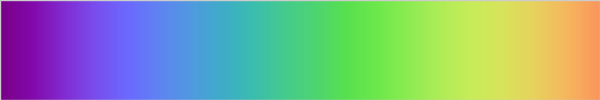

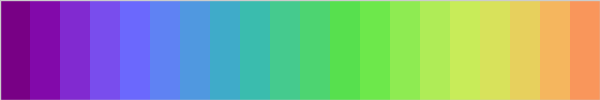

In [268]:
#Choose Color Palette for Graphs
import palettable

colors = palettable.mycarta.Cube1_20.mpl_colors
cmap = palettable.mycarta.Cube1_20.mpl_colormap
palettable.mycarta.Cube1_20.show_continuous_image()
palettable.mycarta.Cube1_20.show_discrete_image()


In [269]:
#OTU Table #Added 'Taxonomy' Column for import
OTU_taxa_table = pd.read_csv(otu_taxa_file, sep='\t')
OTU_taxa_table.set_index('DUP_ID', inplace=True)
OTU_taxa_table.head()
ot_tab = OTU_taxa_table.drop('Taxonomy', axis=1)
ot_tab.head()

,14213c01_12_S1,14213c01_12_S2,14213c01_12_S3,22013c01_12_S4,22013c01_12_S5,22013c01_12_S6,CN13Dc01_12_S7,CN13Dc01_12_S8,CN13Dc01_12_S9,05114c01_12_S10,...,33306C1_0m_3_S62,pcrblank2_S63,EB20161121_S64_S64,EB20161228_S65_S65,EB20170117_S66_S66,pcrblank3_S67,CBCANON160925_1_S68,CBCANON160925_2_S69,CBCANON160925_3_S70,ArtComm2_S72
DUP_ID,,,,,,,,,,,,,,,,,,,,,
OTU_1,8,3,8,70,67,196,366,129,289,15489,...,979,0,0,1366,1,0,210,2,226,14
OTU_2,151,220,242,907,864,1506,479,183,622,15506,...,1648,0,0,403,48,0,589,152,0,6
OTU_3,3,9,19,10,4,6,5,7,7,4,...,365,0,0,574,0,0,116,175,143,6014
OTU_4,0,3,5,5,8,11,10,4,7,3,...,786,0,0,0,38,0,1,0,1,7
OTU_5,185,245,280,248,219,386,215,114,260,6653,...,1332,0,0,169,2,0,199,0,0,2


In [270]:
#Sample Data
samp_tab = pd.read_csv(metadata_file)
samp_tab.set_index('sample_name', inplace=True)
print(list(samp_tab))
samp_tab= samp_tab[['sample_type', 'DATE_TIME_GMT','Description']]
samp_tab.head()

['order', 'tag_sequence', 'primer_sequence_F', 'primer_sequence_R', 'library_tag_combo', 'library', 'date_PCR', 'sample_type', 'locus', 'tag_number', 'R1', 'R2', 'CRUISE_NAME', 'STATION_NUMBER', 'BOTTLE', 'DEPTH_M', 'STATION_NAME', 'PROJECT', 'PLATFORM', 'DEC_LAT', 'DEC_LONG', 'TMP_C', 'SAL', 'CHL_MG_M-3', 'PRESSURE_DBAR', 'NO3_um', 'OXY_ML', 'RDEP_M', 'TRANSMISS_%', 'SIG_T_KG_M-3', 'FLUOR_V', 'DATE_TIME_GMT', 'Description', 'SAMPLING_PI', 'SAMPLING_Institute', 'ENVIRONMENT_Biome', 'ENVIRONMENT_Feature', 'ENVIRONMENT_material', 'SAMPLE_Collection_Device', 'Project', 'samp_vol_we_dna_ext', 'samp_filter_size_ext', 'samp_filter_ext_type', 'samp_store_temp', 'Sequencing_type', 'Sequencing_facility', 'geo_loc_name', 'investigation_type']


,sample_type,DATE_TIME_GMT,Description
sample_name,,,
14213c01_12_S1,environmental,5/22/13 15:47,NaN
14213c01_12_S2,environmental,5/22/13 15:47,NaN
14213c01_12_S3,environmental,5/22/13 15:47,NaN
22013c01_12_S4,environmental,8/8/13 14:41,NaN
22013c01_12_S5,environmental,8/8/13 14:41,NaN


In [271]:
#Taxa Table
taxa_dat = OTU_taxa_table[['Taxonomy']]
taxa_dat['Kingdom']= taxa_dat['Taxonomy'].str.replace('[','').str.replace('[','').str.split("','").str[0].str.replace("'k__", "")
taxa_dat['Phylum']= taxa_dat['Taxonomy'].str.replace('[','').str.replace('[','').str.split("','").str[1].str.replace('p__', '')
taxa_dat['Class']= taxa_dat['Taxonomy'].str.replace('[','').str.replace('[','').str.split("','").str[2].str.replace('c__', '')
taxa_dat['Order']= taxa_dat['Taxonomy'].str.replace('[','').str.replace('[','').str.split("','").str[3].str.replace('o__', '')
taxa_dat['Family']= taxa_dat['Taxonomy'].str.replace('[','').str.replace('[','').str.split("','").str[4].str.replace('f__', '')
taxa_dat['Genus']= taxa_dat['Taxonomy'].str.replace('[','').str.replace('[','').str.split("','").str[5].str.replace('g__', '')
taxa_dat['Species']= taxa_dat['Taxonomy'].str.replace('[','').str.replace('[','').str.split("','").str[6].str.replace('s__', '').str.replace("']", "")
taxa_dat.drop('Taxonomy', axis=1, inplace=True)
levels = list(taxa_dat)
print(levels)
taxa_dat.head()

/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']


,Kingdom,Phylum,Class,Order,Family,Genus,Species
DUP_ID,,,,,,,
OTU_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OTU_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OTU_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OTU_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OTU_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [272]:
#Limit to a certain taxonomy
#Ch= taxa_dat.loc[taxa_dat['Class'] == 'Maxillopoda']
Ch= taxa_dat.loc[taxa_dat['Kingdom'] == 'Eukaryota']

#make list of OTUs
otu_list = Ch.index.tolist()
Ch

,Kingdom,Phylum,Class,Order,Family,Genus,Species
DUP_ID,,,,,,,
OTU_7,Eukaryota,Dinophyceae,Dinophyceae,Gymnodiniales,Gymnodiniaceae,Cochlodinium,Cochlodinium fulvescens
OTU_13,Eukaryota,Chlorophyta,Mamiellophyceae,Mamiellales,Bathycoccaceae,Ostreococcus,
OTU_14,Eukaryota,Dinophyceae,Dinophyceae,Gonyaulacales,Gonyaulacaceae,Alexandrium,
OTU_16,Eukaryota,Bacillariophyta,Bacillariophyceae,Bacillariales,Bacillariaceae,Pseudo-nitzschia,Pseudo-nitzschia fraudulenta
OTU_21,Eukaryota,Arthropoda,Maxillopoda,Poecilostomatoida,Corycaeidae,Corycaeus,Corycaeus speciosus
OTU_23,Eukaryota,Bacillariophyta,Bacillariophyceae,Bacillariales,Bacillariaceae,Pseudo-nitzschia,Pseudo-nitzschia australis
OTU_25,Eukaryota,Dinophyceae,Dinophyceae,Peridiniales,Protoperidiniaceae,Protoperidinium,Protoperidinium crassipes
OTU_27,Eukaryota,Dinophyceae,Dinophyceae,Gonyaulacales,Ceratiaceae,Ceratium,Ceratium tenue
OTU_30,Eukaryota,Dinophyceae,Dinophyceae,Peridiniales,Peridiniaceae,Pentapharsodinium,Pentapharsodinium sp. CCMP771


In [273]:
#want list of OTUs (named DUP) and species names; create dictionary of OTU to taxonomy
ot_sp = Ch[:]
ot_sp = ot_sp.T
ot_sp_D = ot_sp.to_dict('list')
#ot_sp_D

In [274]:
#import xml file and use biopython to parse
#<BlastOutput_query-def>DUP_1;size=1373846</BlastOutput_query-def>
#<Hit_def>Uncultured marine group II euryarchaeote clone 67i small subunit ribosomal RNA gene, partial sequence</Hit_def>

#xml file
#'~/Projects/MBON/processed/COI/Analysis_20161130_1242_COI_C1/all_lib/COI.xml'

genus=[]
species=[]
query=[]
#Dictionary to store hits
hit_dict ={}

#otu_list contains OTUs
#ot_sp_D dictionary with OTU as key, taxonomy list as value

result_handle =open(blast_file)
from Bio.Blast import NCBIXML
blast_records= NCBIXML.parse(result_handle)
for blast_record in blast_records:
    x=0    #hit ID counter
    query = blast_record.query.split(';')[0].replace('DUP', 'OTU')
    #See if this OTU was assigned to the group that we care about:
    if query in otu_list:
        genus = ot_sp_D[query][-2]
        species = ot_sp_D[query][-1]
        #print(genus, species)
        for alignment in blast_record.alignments:
            x+=1       #hit ID counter
            hit_ID=x   #hit ID counter
            key = (query, hit_ID)
            hsp = alignment.hsps[0] #only look at top hsp
            #set limits on evalue and bitscore and % Identity
            per_iden = hsp.identities/hsp.align_length
            per_iden = (per_iden *100)
            evalue = hsp.expect
            bitscore = int(hsp.bits)
            #alignment length
            align_len = hsp.align_length
            if evalue < 1e-10 and bitscore > 100 and per_iden >= 70:
            #if evalue < 1e-25 and bitscore > 160 and per_iden > 90:
                #create dictionary of hit and stats
                #hit_dict['newkey'] = 'newvalue'
                #value: ('eval','bitscore', '%ID', 'genus', 'species', 'hit_def')
                #genus = genus_h if present in hit_def
                #species = species_h if present in hit_def
                if species == 's__':
                    species_h = 'genus_only'
                    #MEGAN assigned to genus level
                elif species == '':
                    species_h = 'genus_only'
                #if the hsp contains the species ID from MEGAN
                else:
                    if species in alignment.hit_def:
                        species_h = species
                    else:
                        species_h ='Nan'
                #if the hsp contains the genus ID from MEGAN:
                if genus in alignment.hit_def:
                    genus_h = genus
                else:
                    genus_h = 'Nan'
                value = (evalue, bitscore, per_iden, genus_h, species_h, alignment.hit_def, align_len)
                hit_dict[key]=value
                genus_h=''
                species_h=''
print ('Done!')   

Done!


In [275]:
Blast_Results = pd.DataFrame(hit_dict)
Blast_Results=Blast_Results.T 
Blast_Results.columns = ['eval','bitscore', '%ID', 'genus', 'species', 'hit_def', 'align_len']
filename = dest_loc + analysis_name+'_xml_stats'+st+'.csv'
Blast_Results.to_csv(filename)
Blast_Results

eval bitscore      %ID             genus  \
OTU_100045 1   9.44356e-31      143  87.9032               Nan   
           2   9.44356e-31      143  87.9032  Pseudo-nitzschia   
           3   4.39366e-29      137  87.0968  Pseudo-nitzschia   
           4   4.39366e-29      137  87.0968               Nan   
           5   4.39366e-29      137  87.0968               Nan   
           6   4.39366e-29      137  87.0968               Nan   
           7   4.39366e-29      137  87.0968  Pseudo-nitzschia   
           8   4.39366e-29      137  87.0968               Nan   
           9   1.58024e-28      135  87.0968               Nan   
           10  2.04417e-27      132  86.2903               Nan   
           11  2.04417e-27      132  86.2903               Nan   
           12  2.04417e-27      132  86.2903               Nan   
           13  2.04417e-27      132  86.2903               Nan   
           14  2.04417e-27      132  86.2903               Nan   
           15  2.04417e-27      132  86.2903               Nan   
           16  2.04417e-27      132  86.2903               Nan   
           17  2.04417e-27      132  86.2903               Nan   
           18  2.04417e-27      132  86.2903               Nan   
           19  2.04417e-27      132  86.2903               Nan   
           20  2.04417e-27      132  86.2903               Nan   
           21  2.66308e-21      111  83.4646               Nan   
           22  3.44491e-20      108  83.0645               Nan   
OTU_100087 1   1.62735e-58      235  98.4962         Chrysaora   
           2   7.57135e-57      230  97.7444         Chrysaora   
           3   1.63891e-53      219  96.2406               Nan   
           4    7.6251e-52      213  95.5224         Chrysaora   
           5   3.54761e-50      207  94.7368         Chrysaora   
           6   7.67923e-47      196  93.2331         Chrysaora   
           7   7.67923e-47      196  93.2331         Chrysaora   
           8   7.67923e-47      196  93.2331         Chrysaora   
...                    ...      ...      ...               ...   
OTU_99927  19  1.70997e-23      119  83.2117               Nan   
           20  7.95573e-22      113  82.3529               Nan   
           21  7.95573e-22      113  82.6087               Nan   
OTU_9997   1   4.19584e-54      220     98.4    Euduboscquella   
           2   4.19584e-54      220     98.4    Euduboscquella   
           3   4.19584e-54      220     98.4    Euduboscquella   
           4   4.19584e-54      220     98.4    Euduboscquella   
           5   4.19584e-54      220     98.4    Euduboscquella   
           6   4.19584e-54      220     98.4    Euduboscquella   
           7   9.08241e-51      209     96.8               Nan   
           8   3.26661e-50      207  98.3051    Euduboscquella   
           9   3.26661e-50      207  98.3051    Euduboscquella   
           10  3.26661e-50      207  98.3051    Euduboscquella   
           11  3.26661e-50      207  98.3051    Euduboscquella   
           12  3.26661e-50      207  98.3051    Euduboscquella   
           13  3.26661e-50      207  98.3051    Euduboscquella   
           14  3.26661e-50      207  97.5207               Nan   
           15  7.07098e-47      196  96.6102    Euduboscquella   
           16  1.97995e-42      182  98.0769    Euduboscquella   
           17  3.31316e-40      174  92.0635    Euduboscquella   
           18  1.99401e-37      165     90.4    Euduboscquella   
           19  7.17174e-37      163     90.4               Nan   
           20  3.36037e-30      141     87.2               Nan   
           21  4.37778e-24      121   84.252               Nan   
           22  2.03678e-22      115  83.4646               Nan   
           23  2.03678e-22      115  83.4646               Nan   
           24  2.03678e-22      115  83.5938               Nan   
           25  2.03678e-22      115  83.7209               Nan   
           26  2.63474e-21      111  83.0769               Nan

In [288]:
test = Blast_Results.loc[Blast_Results['species']=='genus_only']
test

eval bitscore      %ID           genus     species  \
OTU_100118 1   1.19169e-54      222   99.187        Navicula  genus_only   
           2   1.19169e-54      222   99.187        Navicula  genus_only   
           3   1.19169e-54      222   99.187        Navicula  genus_only   
           4   1.19169e-54      222   99.187        Navicula  genus_only   
           5   1.19169e-54      222   99.187        Navicula  genus_only   
           6   1.19169e-54      222   99.187             Nan  genus_only   
           7   1.19169e-54      222   99.187        Navicula  genus_only   
           8   1.19169e-54      222   99.187        Navicula  genus_only   
           9   4.28608e-54      220      100             Nan  genus_only   
           10  4.28608e-54      220      100             Nan  genus_only   
           11  4.28608e-54      220  99.1803             Nan  genus_only   
           12  5.54439e-53      217   98.374        Navicula  genus_only   
           13  5.54439e-53      217   98.374        Navicula  genus_only   
           14  5.54439e-53      217   98.374             Nan  genus_only   
           15  5.54439e-53      217   98.374             Nan  genus_only   
           16  5.54439e-53      217   98.374        Navicula  genus_only   
           17  5.54439e-53      217   98.374        Navicula  genus_only   
           18  1.99412e-52      215  98.3607             Nan  genus_only   
           19  2.57955e-51      211   97.561             Nan  genus_only   
           20  2.57955e-51      211   97.561             Nan  genus_only   
           21  2.61631e-41      178  92.6829             Nan  genus_only   
           22  1.57461e-38      169   92.437             Nan  genus_only   
           23  1.57461e-38      169  91.0569             Nan  genus_only   
           24   4.4091e-34      154  89.4309             Nan  genus_only   
OTU_100120 1   2.56137e-56      228      100     Skeletonema  genus_only   
           2   2.56137e-56      228      100     Skeletonema  genus_only   
           3   4.28608e-54      220      100             Nan  genus_only   
           4   4.28608e-54      220      100             Nan  genus_only   
           5   4.28608e-54      220      100             Nan  genus_only   
           6   2.57955e-51      211   97.561     Skeletonema  genus_only   
...                    ...      ...      ...             ...         ...   
OTU_9992   22  1.24336e-24      122  84.6774             Nan  genus_only   
           23  1.60839e-23      119   84.127             Nan  genus_only   
           24  9.68002e-21      110  82.2581             Nan  genus_only   
OTU_9997   1   4.19584e-54      220     98.4  Euduboscquella  genus_only   
           2   4.19584e-54      220     98.4  Euduboscquella  genus_only   
           3   4.19584e-54      220     98.4  Euduboscquella  genus_only   
           4   4.19584e-54      220     98.4  Euduboscquella  genus_only   
           5   4.19584e-54      220     98.4  Euduboscquella  genus_only   
           6   4.19584e-54      220     98.4  Euduboscquella  genus_only   
           7   9.08241e-51      209     96.8             Nan  genus_only   
           8   3.26661e-50      207  98.3051  Euduboscquella  genus_only   
           9   3.26661e-50      207  98.3051  Euduboscquella  genus_only   
           10  3.26661e-50      207  98.3051  Euduboscquella  genus_only   
           11  3.26661e-50      207  98.3051  Euduboscquella  genus_only   
           12  3.26661e-50      207  98.3051  Euduboscquella  genus_only   
           13  3.26661e-50      207  98.3051  Euduboscquella  genus_only   
           14  3.26661e-50      207  97.5207             Nan  genus_only   
           15  7.07098e-47      196  96.6102  Euduboscquella  genus_only   
           16  1.97995e-42      182  98.0769  Euduboscquella  genus_only   
           17  3.31316e-40      174  92.0635  Euduboscquella  genus_only   
           18  1.99401e-37      165     90.4  Euduboscquella  genus_on

# Get Stats for Blast Results
- What is the top hit for species? top hit for genus?

In [289]:
#Top hit for genus level, species level
#Restrict df to entries within 'genus'
stats = Blast_Results[:]
#Can get rid of Nan's or keep rows to get stats of first off-target hit
#stats = stats.loc[stats['genus']!='Nan']
stats.reset_index(inplace=True)
stats = stats.rename(columns={'level_0': 'OTU', 'level_1': 'Hit_number'})
#list organized by bitscore (hit organization in xml file, keep first keeps top bitscore)
stats = stats.drop_duplicates(subset=['genus', 'species', 'OTU'], keep='first')
stats.set_index(['OTU', 'Hit_number'], inplace=True)
stats[['eval', 'bitscore', '%ID', 'align_len']]= stats[['eval', 'bitscore', '%ID', 'align_len']].apply(pd.to_numeric)
stats.head()

eval  bitscore        %ID             genus  \
OTU        Hit_number                                                        
OTU_100045 1           9.443560e-31       143  87.903226               Nan   
           2           9.443560e-31       143  87.903226  Pseudo-nitzschia   
           3           4.393660e-29       137  87.096774  Pseudo-nitzschia   
OTU_100087 1           1.627350e-58       235  98.496241         Chrysaora   
           2           7.571350e-57       230  97.744361         Chrysaora   

                                        species  \
OTU        Hit_number                             
OTU_100045 1                                Nan   
           2           Pseudo-nitzschia seriata   
           3                                Nan   
OTU_100087 1               Chrysaora fuscescens   
           2                                Nan   

                                                                 hit_def  \
OTU        Hit_number                                                      
OTU_100045 1           Uncultured marine eukaryote clone CNCIII51_36 ...   
           2           Pseudo-nitzschia seriata 18S ribosomal RNA gen...   
           3           Pseudo-nitzschia subcurvata strain UNC1409 18S...   
OTU_100087 1           Chrysaora fuscescens isolate M0D14619G 18S sma...   
           2           Chrysaora colorata small subunit ribosomal RNA...   

                       align_len  
OTU        Hit_number             
OTU_100045 1                 124  
           2                 124  
           3                 124  
OTU_100087 1                 133  
           2                 133

# Filter OTU Table by Top Hit Values

In [290]:
#Link to MEGAN Taxonomy and Filter; Join with taxa_df
b_stats = stats.reset_index().set_index('OTU')
Total = b_stats.join(Ch, how='left')
Total.reset_index(inplace=True)
Total.set_index(['index', 'Hit_number'], inplace=True)
Total

eval  bitscore         %ID             genus  \
index      Hit_number                                                         
OTU_100045 1           9.443560e-31       143   87.903226               Nan   
           2           9.443560e-31       143   87.903226  Pseudo-nitzschia   
           3           4.393660e-29       137   87.096774  Pseudo-nitzschia   
OTU_100087 1           1.627350e-58       235   98.496241         Chrysaora   
           2           7.571350e-57       230   97.744361         Chrysaora   
           3           1.638910e-53       219   96.240602               Nan   
OTU_100102 1           5.737110e-58       233   98.496241         Chrysaora   
           2           2.669220e-56       228   97.744361         Chrysaora   
           3           5.777840e-53       217   96.240602               Nan   
OTU_100113 1           5.544390e-53       217   98.373984  Pseudo-nitzschia   
           4           2.579550e-51       211   97.560976  Pseudo-nitzschia   
           9           5.583750e-48       200   95.934959               Nan   
OTU_100115 1           5.544390e-53       217   98.373984  Pseudo-nitzschia   
           4           2.579550e-51       211   97.560976  Pseudo-nitzschia   
           9           5.583750e-48       200   95.934959               Nan   
OTU_100116 1           1.994120e-52       215   99.159664               Nan   
           4           1.994120e-52       215   98.360656         Guinardia   
           8           5.583750e-48       200   97.435897         Guinardia   
OTU_100118 1           1.191690e-54       222   99.186992          Navicula   
           6           1.191690e-54       222   99.186992               Nan   
OTU_100120 1           2.561370e-56       228  100.000000       Skeletonema   
           3           4.286080e-54       220  100.000000               Nan   
OTU_100145 1           3.325180e-45       191   93.798450         Protaspis   
           2           1.547060e-43       185   93.023256         Protaspis   
           5           3.348790e-40       174   91.472868               Nan   
OTU_100187 1           1.208200e-59       239  100.000000               Nan   
           2           1.562910e-58       235  100.000000        Laetisaria   
OTU_100188 1           5.621210e-58       233   99.224806               Nan   
           3           5.621210e-58       233   99.224806           Phlebia   
           5           5.621210e-58       233   99.224806           Phlebia   
...                             ...       ...         ...               ...   
OTU_99657  2           2.029410e-47       198   94.531250         Protaspis   
           5           4.392910e-44       187   92.968750               Nan   
OTU_99669  1           1.541550e-53       219   97.637795             Beroe   
           8           3.360550e-45       191   93.700787               Nan   
OTU_99681  1           2.165540e-37       165   93.693694      Mitrocomella   
           2           4.687570e-34       154   91.891892      Mitrocomella   
           3           3.649440e-30       141   86.821705               Nan   
OTU_997    1           9.821400e-61       243   99.253731               Nan   
           2           9.821400e-61       243   99.253731           Mytilus   
OTU_99703  1           2.633860e-51       211   96.124031       Salpingoeca   
           3           1.242880e-39       172   90.839695               Nan   
OTU_99782  1           7.517970e-62       246  100.000000           Glycera   
           14          3.522600e-55       224   96.992481               Nan   
OTU_99783  1           1.638910e-53       219   96.240602              Idas   
           2           7.625100e-52       213   95.488722              Idas   
           3           3.547610e-50       207   94.736842               Nan   
OTU_99784  1           2.078080e-52       215   96.183206               Nan   
OTU_99792  1           7.571350e-57       230   97.744361      Podarkeopsis   
  

In [291]:
#Df of just the best hit to the MEGAN taxon, with taxonomy
Total_best = Total.loc[Total['genus']!='Nan']
Total_best = Total_best.loc[Total['species']!='Nan']
Total_best

,,eval,bitscore,%ID,genus,species,hit_def,align_len,Kingdom,Phylum,Class,Order,Family,Genus,Species
index,Hit_number,,,,,,,,,,,,,,
OTU_100045,2,9.443560e-31,143,87.903226,Pseudo-nitzschia,Pseudo-nitzschia seriata,Pseudo-nitzschia seriata 18S ribosomal RNA gen...,124,Eukaryota,Bacillariophyta,Bacillariophyceae,Bacillariales,Bacillariaceae,Pseudo-nitzschia,Pseudo-nitzschia seriata
OTU_100087,1,1.627350e-58,235,98.496241,Chrysaora,Chrysaora fuscescens,Chrysaora fuscescens isolate M0D14619G 18S sma...,133,Eukaryota,Cnidaria,Scyphozoa,Semaeostomeae,Pelagiidae,Chrysaora,Chrysaora fuscescens
OTU_100102,1,5.737110e-58,233,98.496241,Chrysaora,Chrysaora fuscescens,Chrysaora fuscescens isolate M0D14619G 18S sma...,133,Eukaryota,Cnidaria,Scyphozoa,Semaeostomeae,Pelagiidae,Chrysaora,Chrysaora fuscescens
OTU_100113,1,5.544390e-53,217,98.373984,Pseudo-nitzschia,Pseudo-nitzschia australis,Pseudo-nitzschia australis isolate 10249 10AB ...,123,Eukaryota,Bacillariophyta,Bacillariophyceae,Bacillariales,Bacillariaceae,Pseudo-nitzschia,Pseudo-nitzschia australis
OTU_100115,1,5.544390e-53,217,98.373984,Pseudo-nitzschia,Pseudo-nitzschia australis,Pseudo-nitzschia australis isolate 10249 10AB ...,123,Eukaryota,Bacillariophyta,Bacillariophyceae,Bacillariales,Bacillariaceae,Pseudo-nitzschia,Pseudo-nitzschia australis
OTU_100116,4,1.994120e-52,215,98.360656,Guinardia,Guinardia flaccida,"Guinardia flaccida 18S rRNA gene, clone p788",122,Eukaryota,Bacillariophyta,Coscinodiscophyceae,Rhizosoleniophycidae,Rhizosoleniaceae,Guinardia,Guinardia flaccida
OTU_100118,1,1.191690e-54,222,99.186992,Navicula,genus_only,Navicula tripunctata clone 05DB1_21 18S riboso...,123,Eukaryota,Bacillariophyta,Bacillariophyceae,Naviculales,Naviculaceae,Navicula,
OTU_100120,1,2.561370e-56,228,100.000000,Skeletonema,genus_only,"Skeletonema menzelii 18S rRNA gene, strain SZN...",123,Eukaryota,Bacillariophyta,Coscinodiscophyceae,Thalassiosirales,Skeletonemataceae,Skeletonema,
OTU_100145,1,3.325180e-45,191,93.798450,Protaspis,Protaspis sp. CC-2009c,Protaspis sp. CC-2009c small subunit ribosomal...,129,Eukaryota,Cercozoa,Cercozoa,Thaumatomonadida,Thaumatomastigidae,Protaspis,Protaspis sp. CC-2009c


In [292]:
#check no duplicates, one entry per OTU
dups = Total_best.reset_index().duplicated(subset=['index'])
dups = dups.value_counts()
#Check that all False entries, no True
dups

False    4534
dtype: int64

In [293]:
#define genus limits for blast score; right now only have OTUs assigned to genus and species level
per_ID_lim = 95
#bitscore_lim = 400
Total_lim =Total_best[:]
#Total_lim.loc[Total_best['bitscore'] < bitscore_lim, 'Genus'] = "Removed"
Total_lim.loc[Total_best['%ID'] < per_ID_lim, 'Genus'] = "Removed"


#define species limits for blast score
per_ID_lim = 97
#bitscore_lim = 500
#Total_lim.loc[Total_best['bitscore'] < bitscore_lim, 'Species'] = "Removed"
Total_lim.loc[Total_best['%ID'] < per_ID_lim, 'Species'] = "Removed"

Total_lim

,,eval,bitscore,%ID,genus,species,hit_def,align_len,Kingdom,Phylum,Class,Order,Family,Genus,Species
index,Hit_number,,,,,,,,,,,,,,
OTU_100045,2,9.443560e-31,143,87.903226,Pseudo-nitzschia,Pseudo-nitzschia seriata,Pseudo-nitzschia seriata 18S ribosomal RNA gen...,124,Eukaryota,Bacillariophyta,Bacillariophyceae,Bacillariales,Bacillariaceae,Removed,Removed
OTU_100087,1,1.627350e-58,235,98.496241,Chrysaora,Chrysaora fuscescens,Chrysaora fuscescens isolate M0D14619G 18S sma...,133,Eukaryota,Cnidaria,Scyphozoa,Semaeostomeae,Pelagiidae,Chrysaora,Chrysaora fuscescens
OTU_100102,1,5.737110e-58,233,98.496241,Chrysaora,Chrysaora fuscescens,Chrysaora fuscescens isolate M0D14619G 18S sma...,133,Eukaryota,Cnidaria,Scyphozoa,Semaeostomeae,Pelagiidae,Chrysaora,Chrysaora fuscescens
OTU_100113,1,5.544390e-53,217,98.373984,Pseudo-nitzschia,Pseudo-nitzschia australis,Pseudo-nitzschia australis isolate 10249 10AB ...,123,Eukaryota,Bacillariophyta,Bacillariophyceae,Bacillariales,Bacillariaceae,Pseudo-nitzschia,Pseudo-nitzschia australis
OTU_100115,1,5.544390e-53,217,98.373984,Pseudo-nitzschia,Pseudo-nitzschia australis,Pseudo-nitzschia australis isolate 10249 10AB ...,123,Eukaryota,Bacillariophyta,Bacillariophyceae,Bacillariales,Bacillariaceae,Pseudo-nitzschia,Pseudo-nitzschia australis
OTU_100116,4,1.994120e-52,215,98.360656,Guinardia,Guinardia flaccida,"Guinardia flaccida 18S rRNA gene, clone p788",122,Eukaryota,Bacillariophyta,Coscinodiscophyceae,Rhizosoleniophycidae,Rhizosoleniaceae,Guinardia,Guinardia flaccida
OTU_100118,1,1.191690e-54,222,99.186992,Navicula,genus_only,Navicula tripunctata clone 05DB1_21 18S riboso...,123,Eukaryota,Bacillariophyta,Bacillariophyceae,Naviculales,Naviculaceae,Navicula,
OTU_100120,1,2.561370e-56,228,100.000000,Skeletonema,genus_only,"Skeletonema menzelii 18S rRNA gene, strain SZN...",123,Eukaryota,Bacillariophyta,Coscinodiscophyceae,Thalassiosirales,Skeletonemataceae,Skeletonema,
OTU_100145,1,3.325180e-45,191,93.798450,Protaspis,Protaspis sp. CC-2009c,Protaspis sp. CC-2009c small subunit ribosomal...,129,Eukaryota,Cercozoa,Cercozoa,Thaumatomonadida,Thaumatomastigidae,Removed,Removed


# New OTU Table

In [294]:
#Create New OTU Table from selection
ot_lim = Total_lim[levels]
ot_lim = ot_lim.reset_index().drop('Hit_number', axis=1)
ot_lim = ot_lim.rename(columns = {'index':'OTU_ID'})
ot_lim.set_index('OTU_ID', inplace=True)
ot_lim = ot_lim.replace(to_replace='Removed', value='')
filename = dest_loc + analysis_name+'_filtered_OTU_table_'+st+'.csv'
ot_lim.to_csv(filename)
ot_lim

,Kingdom,Phylum,Class,Order,Family,Genus,Species
OTU_ID,,,,,,,
OTU_100045,Eukaryota,Bacillariophyta,Bacillariophyceae,Bacillariales,Bacillariaceae,,
OTU_100087,Eukaryota,Cnidaria,Scyphozoa,Semaeostomeae,Pelagiidae,Chrysaora,Chrysaora fuscescens
OTU_100102,Eukaryota,Cnidaria,Scyphozoa,Semaeostomeae,Pelagiidae,Chrysaora,Chrysaora fuscescens
OTU_100113,Eukaryota,Bacillariophyta,Bacillariophyceae,Bacillariales,Bacillariaceae,Pseudo-nitzschia,Pseudo-nitzschia australis
OTU_100115,Eukaryota,Bacillariophyta,Bacillariophyceae,Bacillariales,Bacillariaceae,Pseudo-nitzschia,Pseudo-nitzschia australis
OTU_100116,Eukaryota,Bacillariophyta,Coscinodiscophyceae,Rhizosoleniophycidae,Rhizosoleniaceae,Guinardia,Guinardia flaccida
OTU_100118,Eukaryota,Bacillariophyta,Bacillariophyceae,Naviculales,Naviculaceae,Navicula,
OTU_100120,Eukaryota,Bacillariophyta,Coscinodiscophyceae,Thalassiosirales,Skeletonemataceae,Skeletonema,
OTU_100145,Eukaryota,Cercozoa,Cercozoa,Thaumatomonadida,Thaumatomastigidae,,


# Plots
- Bitscore and %ID by Phylum from unfiltered OTU table
- Show how Taxonomy shifts after genus and species filters

In [295]:
#Make plot of bitscore/%ID of ALL assigned OTUs by Phyla (over all taxa levels)
#Take top hit of each OTU
#Total contains all info
#If OTU assigned above Genus level, want top Nan hit?
#Won't be able to distinguish off-target hit from hit higher than genus level but in the correct Phyla
#Just take top hit after sorting species and genus
top_Total = Total.reset_index().replace(to_replace='Nan', value=np.NaN).replace(to_replace='genus_only', value=np.NaN)
top_Total = top_Total.sort_values(by=['index','species', 'genus'])
top_Total.drop_duplicates(subset=['index'], keep='first', inplace=True)


#Test it's choosing the correct top hit
#OTU_99836
#test= Total.loc[Total['Genus']=='Synchaeta']
#test= top_Total.loc[top_Total['Genus']=='Synchaeta']
#test

top_Total

,index,Hit_number,eval,bitscore,%ID,genus,species,hit_def,align_len,Kingdom,Phylum,Class,Order,Family,Genus,Species
1,OTU_100045,2,9.443560e-31,143,87.903226,Pseudo-nitzschia,Pseudo-nitzschia seriata,Pseudo-nitzschia seriata 18S ribosomal RNA gen...,124,Eukaryota,Bacillariophyta,Bacillariophyceae,Bacillariales,Bacillariaceae,Pseudo-nitzschia,Pseudo-nitzschia seriata
3,OTU_100087,1,1.627350e-58,235,98.496241,Chrysaora,Chrysaora fuscescens,Chrysaora fuscescens isolate M0D14619G 18S sma...,133,Eukaryota,Cnidaria,Scyphozoa,Semaeostomeae,Pelagiidae,Chrysaora,Chrysaora fuscescens
6,OTU_100102,1,5.737110e-58,233,98.496241,Chrysaora,Chrysaora fuscescens,Chrysaora fuscescens isolate M0D14619G 18S sma...,133,Eukaryota,Cnidaria,Scyphozoa,Semaeostomeae,Pelagiidae,Chrysaora,Chrysaora fuscescens
9,OTU_100113,1,5.544390e-53,217,98.373984,Pseudo-nitzschia,Pseudo-nitzschia australis,Pseudo-nitzschia australis isolate 10249 10AB ...,123,Eukaryota,Bacillariophyta,Bacillariophyceae,Bacillariales,Bacillariaceae,Pseudo-nitzschia,Pseudo-nitzschia australis
12,OTU_100115,1,5.544390e-53,217,98.373984,Pseudo-nitzschia,Pseudo-nitzschia australis,Pseudo-nitzschia australis isolate 10249 10AB ...,123,Eukaryota,Bacillariophyta,Bacillariophyceae,Bacillariales,Bacillariaceae,Pseudo-nitzschia,Pseudo-nitzschia australis
16,OTU_100116,4,1.994120e-52,215,98.360656,Guinardia,Guinardia flaccida,"Guinardia flaccida 18S rRNA gene, clone p788",122,Eukaryota,Bacillariophyta,Coscinodiscophyceae,Rhizosoleniophycidae,Rhizosoleniaceae,Guinardia,Guinardia flaccida
18,OTU_100118,1,1.191690e-54,222,99.186992,Navicula,NaN,Navicula tripunctata clone 05DB1_21 18S riboso...,123,Eukaryota,Bacillariophyta,Bacillariophyceae,Naviculales,Naviculaceae,Navicula,
20,OTU_100120,1,2.561370e-56,228,100.000000,Skeletonema,NaN,"Skeletonema menzelii 18S rRNA gene, strain SZN...",123,Eukaryota,Bacillariophyta,Coscinodiscophyceae,Thalassiosirales,Skeletonemataceae,Skeletonema,
22,OTU_100145,1,3.325180e-45,191,93.798450,Protaspis,Protaspis sp. CC-2009c,Protaspis sp. CC-2009c small subunit ribosomal...,129,Eukaryota,Cercozoa,Cercozoa,Thaumatomonadida,Thaumatomastigidae,Protaspis,Protaspis sp. CC-2009c
26,OTU_100187,2,1.562910e-58,235,100.000000,Laetisaria,Laetisaria fuciformis,"Laetisaria fuciformis 18S ribosomal RNA gene, ...",127,Eukaryota,Basidiomycota,Agaricomycetes,Corticiales,Corticiaceae,Laetisaria,Laetisaria fuciformis


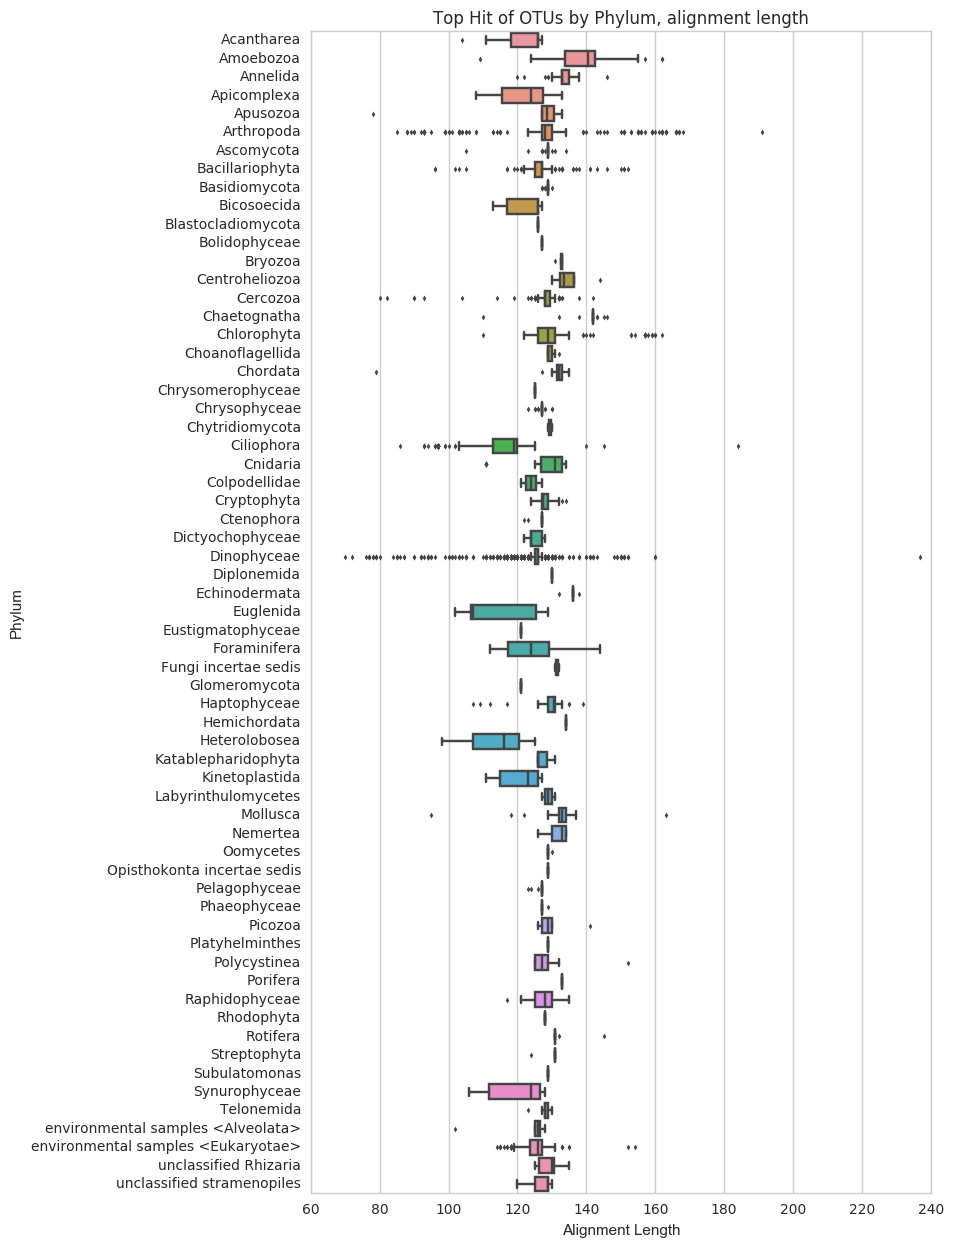

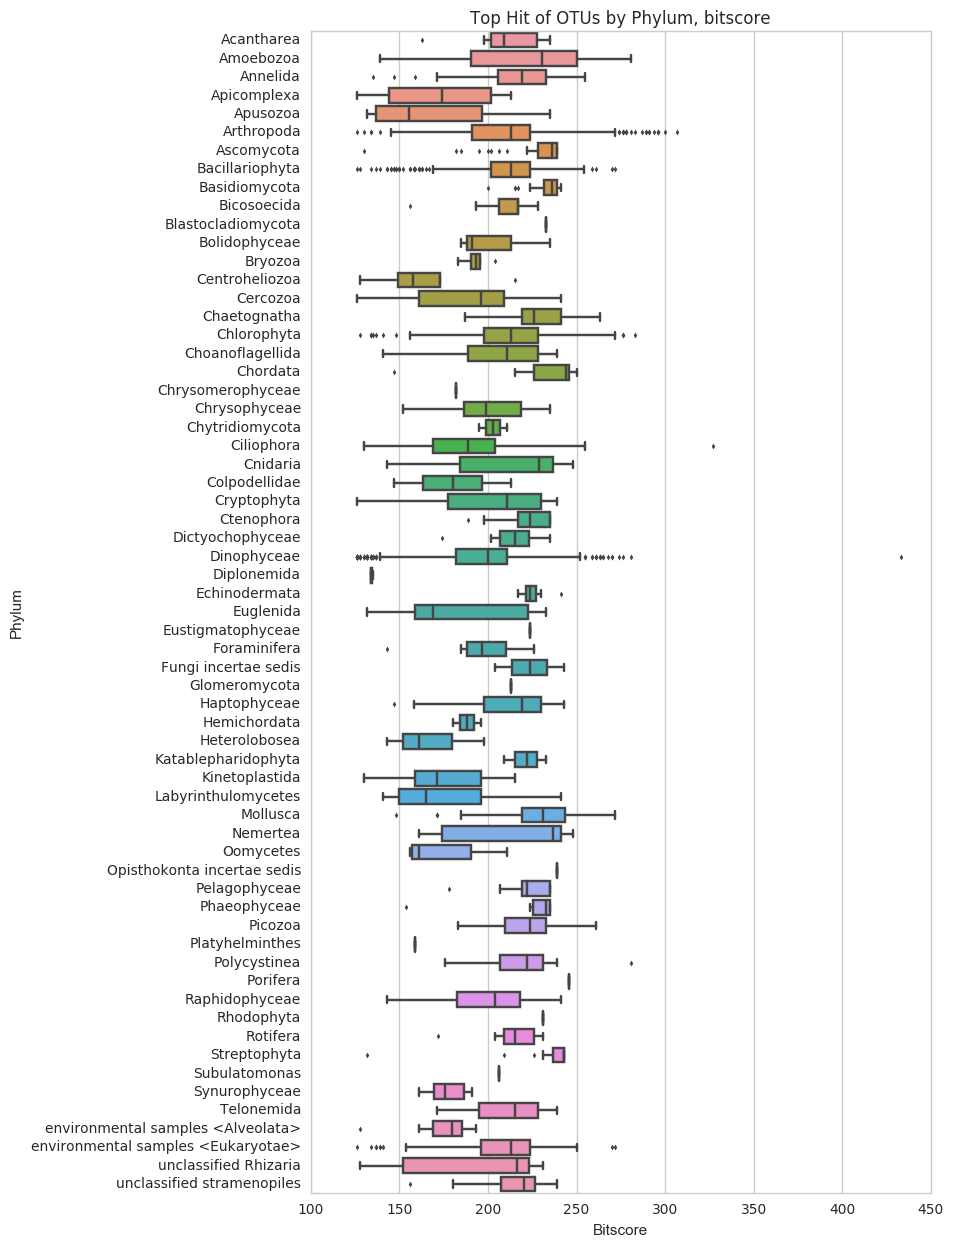

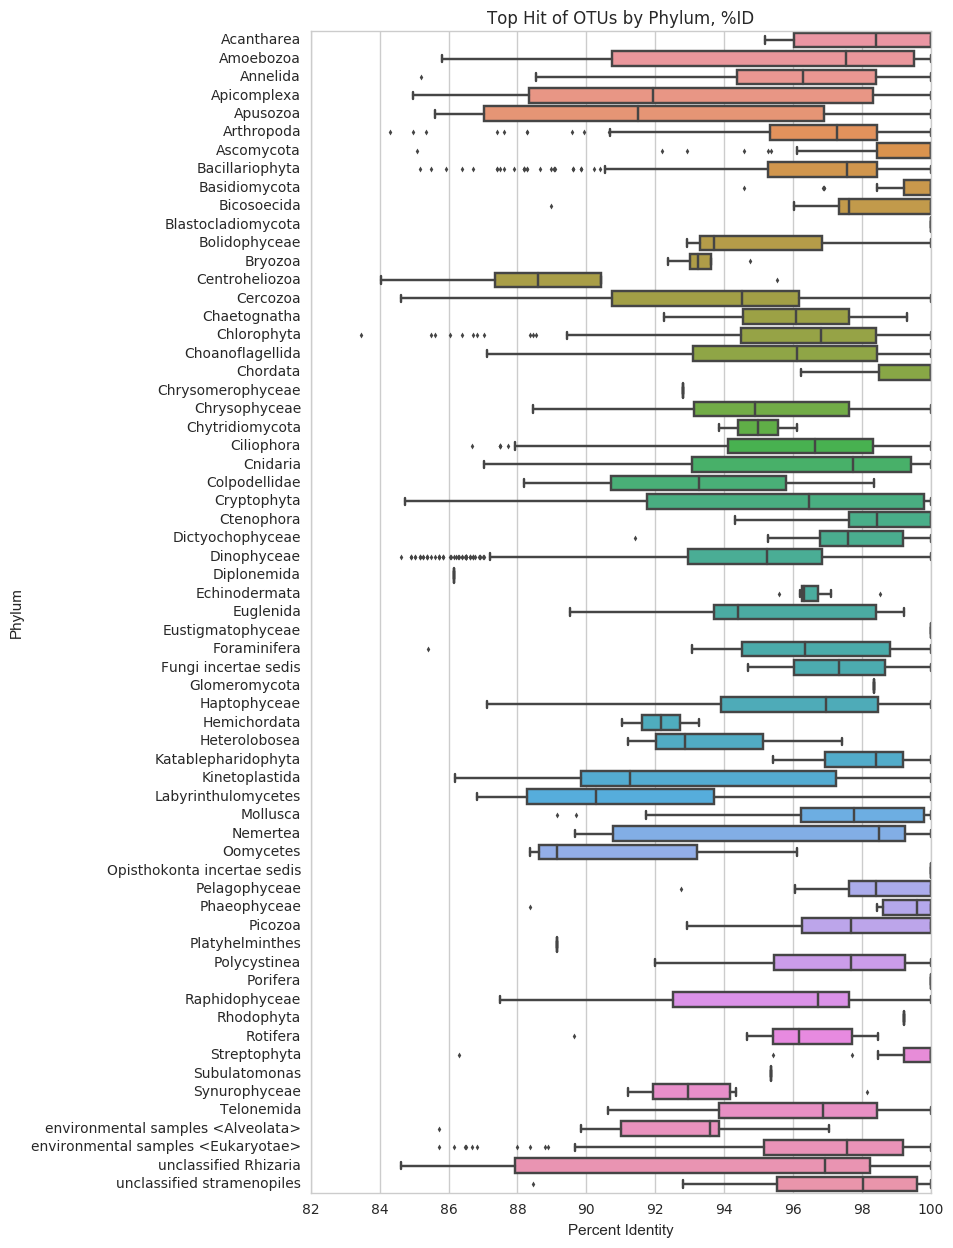

,index,Hit_number,eval,bitscore,%ID,genus,species,hit_def,align_len,Kingdom,Phylum,Class,Order,Family,Genus,Species,avg_bitscore,avg_%ID,avg_align_len
6621,OTU_34498,1,9.082410e-51,209,96.800000,Hexaconus,Hexaconus serratus,Hexaconus serratus gene for small subunit ribo...,125,Eukaryota,Acantharea,Acantharea,Arthracanthida,Hexalaspididae,Hexaconus,Hexaconus serratus,209.428571,97.949014,120.714286
7084,OTU_4298,2,5.447350e-58,233,100.000000,Amphibelone,Amphibelone anomala,Amphibelone anomala gene for small subunit rib...,126,Eukaryota,Acantharea,Acantharea,Symphyacanthida,Amphilithiidae,Amphibelone,Amphibelone anomala,209.428571,97.949014,120.714286
9564,OTU_81129,1,1.530680e-58,235,100.000000,Chaunacanthid sp. 6200,Chaunacanthid sp. 6200,"Chaunacanthid sp. 6200 18S ribosomal RNA gene,...",127,Eukaryota,Acantharea,Acantharea,Chaunacanthida,Chaunacanthid sp. 6200,Chaunacanthid sp. 6200,Chaunacanthid sp. 6200,209.428571,97.949014,120.714286
7507,OTU_51053,1,1.987140e-47,198,95.238095,Hexaconus,Hexaconus serratus,Hexaconus serratus gene for small subunit ribo...,126,Eukaryota,Acantharea,Acantharea,Arthracanthida,Hexalaspididae,Hexaconus,Hexaconus serratus,209.428571,97.949014,120.714286
5435,OTU_19515,1,1.179150e-54,222,98.412698,Acanthometra,NaN,Acanthometra sp. 1 6202 18S ribosomal RNA gene...,126,Eukaryota,Acantharea,Acantharea,Arthracanthida,Acanthometridae,Acanthometra,Acanthometra sp. 1 ICG-2009,209.428571,97.949014,120.714286
6413,OTU_31318,1,1.187520e-49,206,100.000000,Gigartacon,Gigartacon muelleri,Gigartacon muelleri isolate Vil110 18S ribosom...,111,Eukaryota,Acantharea,Acantharea,Chaunacanthida,Gigartacontidae,Gigartacon,Gigartacon muelleri,209.428571,97.949014,120.714286
6862,OTU_38517,1,7.480200e-37,163,95.192308,Trizona,Trizona brandti,Trizona brandti isolate Ros6 18S ribosomal RNA...,104,Eukaryota,Acantharea,Acantharea,Holacanthida,Acanthochiasmidae,Trizona,Trizona brandti,209.428571,97.949014,120.714286
4954,OTU_186236,2,1.370120e-59,239,97.183099,Paramoeba,Paramoeba branchiphila,Paramoeba branchiphila strain O5 clone U2 smal...,142,Eukaryota,Amoebozoa,Amoebozoa,Flabellinia,Paramoebidae,Paramoeba,Paramoeba branchiphila,219.892857,95.403298,139.428571
2035,OTU_126313,1,6.423970e-33,150,86.524823,Parvamoeba,Parvamoeba rugata,Parvamoeba rugata strain CCAP 1556/1 clone 122...,141,Eukaryota,Amoebozoa,Amoebozoa,Himatismenida,Parvamoeba,Parvamoeba,Parvamoeba rugata,219.892857,95.403298,139.428571
4184,OTU_167975,1,9.737010e-46,193,93.233083,Paraflabellula,Paraflabellula hoguae,"Paraflabellula hoguae 18S ribosomal RNA gene, ...",133,Eukaryota,Amoebozoa,Amoebozoa,Leptomyxida,Flabellulidae,Paraflabellula,Paraflabellula hoguae,219.892857,95.403298,139.428571


In [296]:
#Now plot by Phylum
import seaborn as sns
from matplotlib import pyplot

#sns.set(style='ticks')

'''
#Matplotlib style boxplots

top_Total.boxplot(column='%ID', by='Phylum', fontsize=10, vert=False, figsize = (8,15))
plt.title("Top Hit of OTUs by Phylum, %ID")
filename = dest_loc + analysis_name+'_boxplot_perID_Phylum_'+st+'.png'
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
    orientation='landscape', papertype=None, format=None,
    transparent=True, bbox_inches='tight', pad_inches=1,
    frameon=None)

top_Total.boxplot(column='bitscore', by='Phylum', fontsize=10, vert=False, figsize = (8,15))
plt.title("Top Hit of OTUs by Phylum, bitscore")
filename = dest_loc + analysis_name+'_boxplot_bitscore_Phylum_'+st+'.png'
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
    orientation='landscape', papertype=None, format=None,
    transparent=True, bbox_inches='tight', pad_inches=1,
    frameon=None)

top_Total.boxplot(column='align_len', by='Phylum', fontsize=10, vert=False, figsize = (10,20))
plt.title("Top Hit of OTUs by Phylum, alignment length")
plt.xlabel('Alignment Length')
filename = dest_loc + analysis_name+'_boxplot_align_len_Phylum_test'+st+'.png'
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
            orientation='landscape', 
            papertype=None, format=None,
            transparent=True, bbox_inches='tight', pad_inches=1,
            frameon=None)'''


#Include Average values if want to use in plotting
test=top_Total[:]
test=test.groupby('Phylum').mean()
test.rename(columns={'bitscore':'avg_bitscore', '%ID':'avg_%ID', 'align_len':'avg_align_len'}, inplace=True)
test.drop(['Hit_number', 'eval'], axis=1, inplace=True)
#test.reset_index(inplace=True)
test2=top_Total[:]
test3 = test2.join(test, on='Phylum', rsuffix="mean")
#print(test.head())

#test3=test3.sort_values(by='avg_align_len', ascending=False)
test3=test3.sort_values(by='Phylum')


sns.set_style("whitegrid")

#Alignment Length
plt.figure(figsize=(8,15))
sns.boxplot(x='align_len', y='Phylum', data=test3
            #,hue_order='avg_align_len'
            #, order='avg_align_len'
            #, hue='avg_%ID'
            , fliersize=3
           )

plt.title("Top Hit of OTUs by Phylum, alignment length")
plt.xlabel('Alignment Length')
#plt.legend(bbox_to_anchor=(0, 2), loc=2, borderaxespad=0.)
filename = dest_loc + analysis_name+'_boxplot_align_len_Phylum_'+st+'.png'
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
            orientation='landscape', 
            papertype=None, format=None,
            transparent=True, bbox_inches='tight', pad_inches=1,
            frameon=None)

#Bitscore
plt.figure(figsize=(8,15))
sns.boxplot(x='bitscore', y='Phylum', data=test3
            #,hue_order='avg_align_len'
            #, order='avg_align_len'
            #, hue='avg_%ID'
            , fliersize=3
           )

plt.title("Top Hit of OTUs by Phylum, bitscore")
plt.xlabel('Bitscore')
#plt.legend(bbox_to_anchor=(0, 2), loc=2, borderaxespad=0.)
filename = dest_loc + analysis_name+'_boxplot_bitscore_Phylum_'+st+'.png'
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
            orientation='landscape', 
            papertype=None, format=None,
            transparent=True, bbox_inches='tight', pad_inches=1,
            frameon=None)

#Percent Identity
plt.figure(figsize=(8,15))
sns.boxplot(x='%ID', y='Phylum', data=test3
            #,hue_order='avg_align_len'
            #, order='avg_align_len'
            #, hue='avg_%ID'
            , fliersize=3
           )

plt.title("Top Hit of OTUs by Phylum, %ID")
plt.xlabel('Percent Identity')
#plt.legend(bbox_to_anchor=(0, 2), loc=2, borderaxespad=0.)
filename = dest_loc + analysis_name+'_boxplot_PerID_Phylum_'+st+'.png'
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
            orientation='landscape', 
            papertype=None, format=None,
            transparent=True, bbox_inches='tight', pad_inches=1,
            frameon=None)

plt.show()

test3

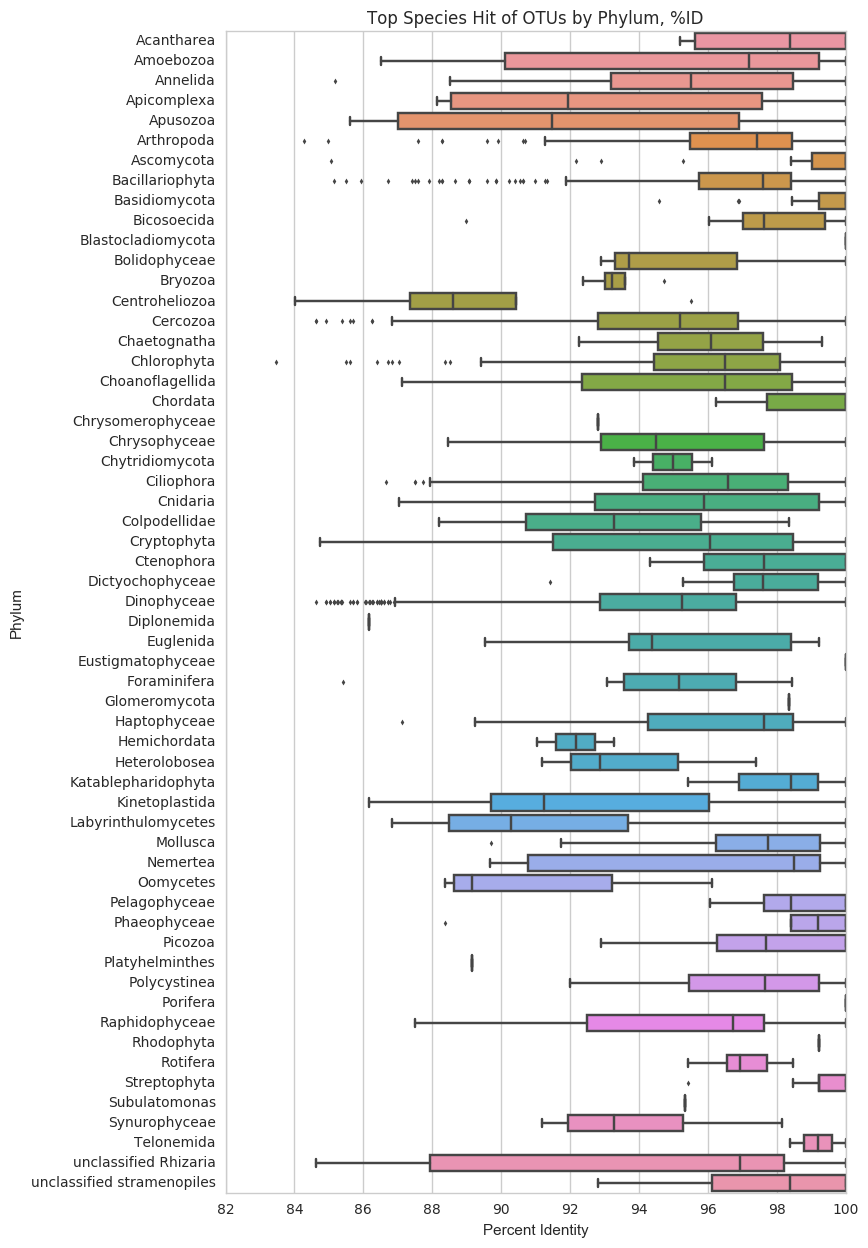

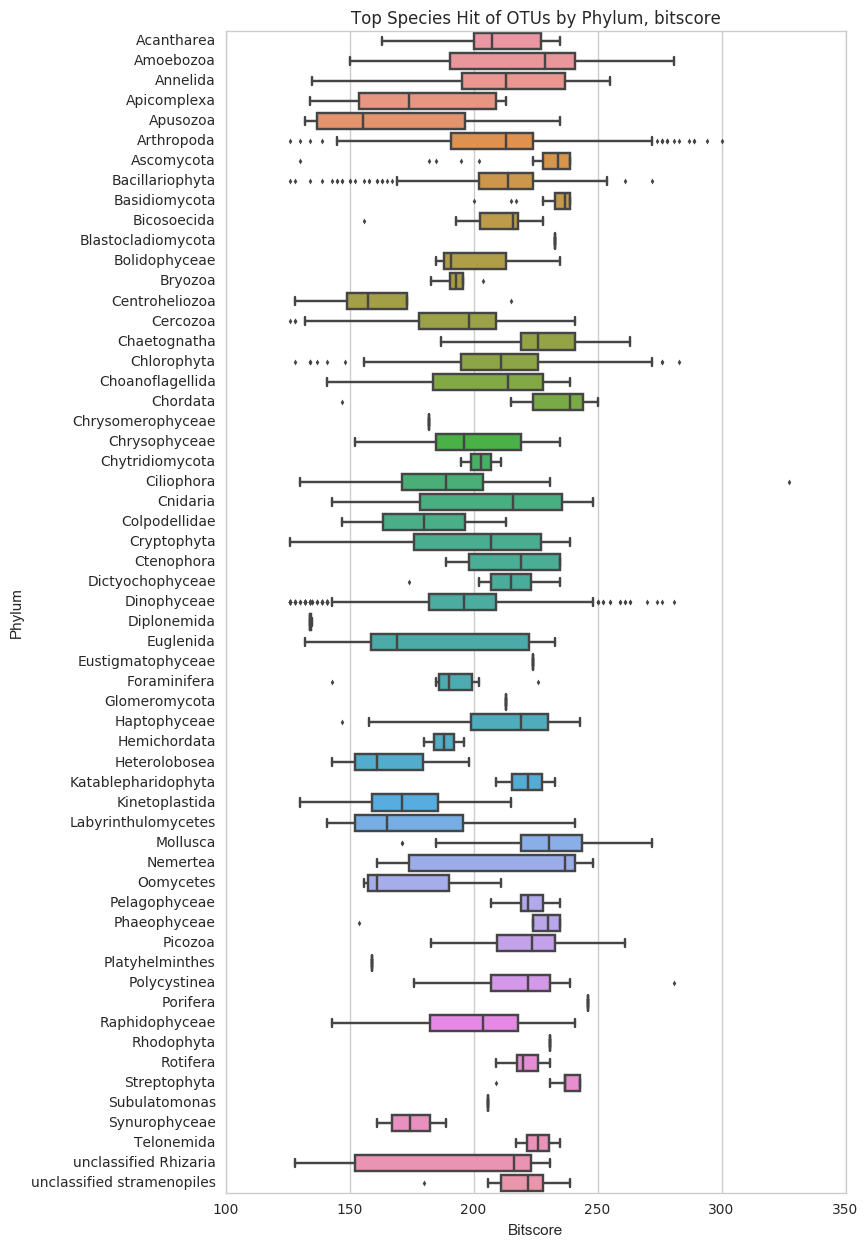

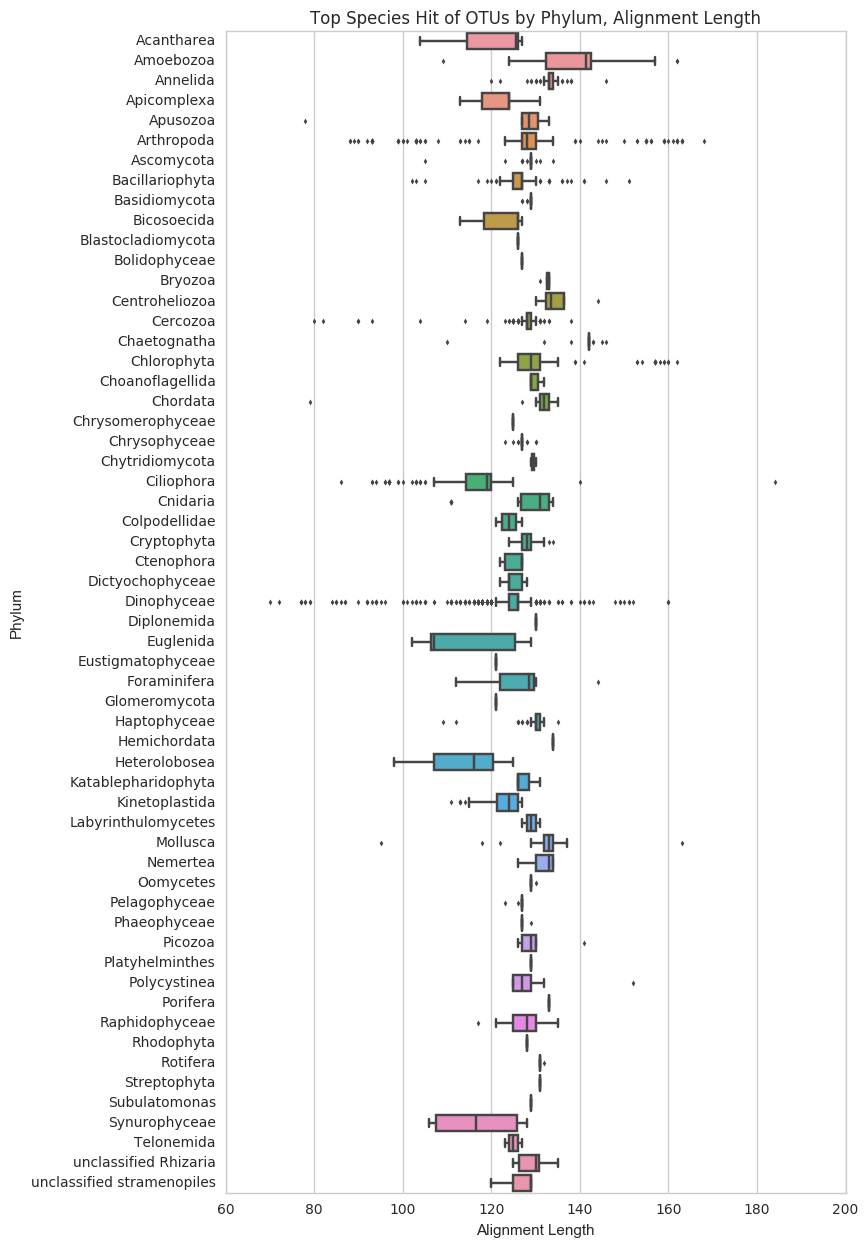

In [297]:
#Total has all the info; Total_best has just best hit to MEGAN taxonomy
#Want to see best hit to MEGAN taxonomy over Phyla (limit to species assignment)- limit by %ID and bitscore

top_stats =Total_best[:]
#[Total_best.genus != 'Nan']
#top_stats =top_stats[top_stats.species != 'Nan']
top_stats =top_stats[top_stats.species != 'genus_only']
top_stats.sort_values(by='Phylum', inplace=True)
#limit perent Identity to 97%; bitscore >=500
#top_stats = top_stats.loc[top_stats['%ID']>=97]
#top_stats = top_stats.loc[top_stats['bitscore']>=500]

plt.figure(figsize=(8,15))
sns.boxplot(x='%ID', y='Phylum', data=top_stats, fliersize=3)
plt.title("Top Species Hit of OTUs by Phylum, %ID")
plt.xlabel('Percent Identity')
filename = dest_loc + analysis_name+'_boxplot_PerID_Phylum_SP_'+st+'.png'
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
            orientation='landscape', 
            papertype=None, format=None,
            transparent=True, bbox_inches='tight', pad_inches=1,
            frameon=None)

plt.figure(figsize=(8,15))
sns.boxplot(x='bitscore', y='Phylum', data=top_stats, fliersize=3)
plt.title("Top Species Hit of OTUs by Phylum, bitscore")
plt.xlabel('Bitscore')
filename = dest_loc + analysis_name+'_boxplot_bitscore_Phylum_SP_'+st+'.png'
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
            orientation='landscape', 
            papertype=None, format=None,
            transparent=True, bbox_inches='tight', pad_inches=1,
            frameon=None)

plt.figure(figsize=(8,15))
sns.boxplot(x='align_len', y='Phylum', data=top_stats, fliersize=3)
plt.title("Top Species Hit of OTUs by Phylum, Alignment Length")
plt.xlabel('Alignment Length')
filename = dest_loc + analysis_name+'_boxplot_alignlen_Phylum_SP_'+st+'.png'
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
            orientation='landscape', 
            papertype=None, format=None,
            transparent=True, bbox_inches='tight', pad_inches=1,
            frameon=None)
plt.show()


In [298]:
#Use for matplotlib formating


'''#Total has all the info; Total_best has just best hit to MEGAN taxonomy
#Want to see best hit to MEGAN taxonomy over Phyla (limit to species assignment)

#Matplotlib formating
top_stats =Total_best[:]
#[Total_best.genus != 'Nan']
#top_stats =top_stats[top_stats.species != 'Nan']
top_stats =top_stats[top_stats.species != 'genus_only']
#top_stats = top_stats.loc[top_stats['%ID']>=97]
top_stats.boxplot(column='%ID', by='Phylum', fontsize=10, vert=False, figsize = (8,15))
plt.title("Avg_stats, %ID")
top_stats.boxplot(column='bitscore', by='Phylum', fontsize=10, vert=False, figsize = (8,15))
plt.title("Avg_stats, bitscore")
top_stats.boxplot(column='align_len', by='Phylum', fontsize=10, vert=False, figsize = (8,15))
plt.title("Avg_stats, alignment length")
plt.show()
#top_stats = top_stats.loc[top_stats['genus']=='Oncaea']
top_stats
'''


'#Total has all the info; Total_best has just best hit to MEGAN taxonomy\n#Want to see best hit to MEGAN taxonomy over Phyla (limit to species assignment)\n\n#Matplotlib formating\ntop_stats =Total_best[:]\n#[Total_best.genus != \'Nan\']\n#top_stats =top_stats[top_stats.species != \'Nan\']\ntop_stats =top_stats[top_stats.species != \'genus_only\']\n#top_stats = top_stats.loc[top_stats[\'%ID\']>=97]\ntop_stats.boxplot(column=\'%ID\', by=\'Phylum\', fontsize=10, vert=False, figsize = (8,15))\nplt.title("Avg_stats, %ID")\ntop_stats.boxplot(column=\'bitscore\', by=\'Phylum\', fontsize=10, vert=False, figsize = (8,15))\nplt.title("Avg_stats, bitscore")\ntop_stats.boxplot(column=\'align_len\', by=\'Phylum\', fontsize=10, vert=False, figsize = (8,15))\nplt.title("Avg_stats, alignment length")\nplt.show()\n#top_stats = top_stats.loc[top_stats[\'genus\']==\'Oncaea\']\ntop_stats\n'

In [299]:
avg_stats = stats.loc[stats['species']!='Nan']
avg_stats = avg_stats.reset_index().groupby(by=['genus', 'species']).mean()
avg_stats.head()

Hit_number          eval  \
genus                species                                                   
Acanthamoeba         Acanthamoeba mauritaniensis           1.0  6.399280e-68   
                     genus_only                            1.0  1.673847e-65   
Acantharian sp. 6201 Acantharian sp. 6201                 16.0  2.098889e-54   
Acanthoeca           Acanthoeca sp. SIOpierAcanth1         1.0  1.208200e-59   
Acartia              Acartia tonsa                         1.0  8.212500e-27   

                                                      bitscore         %ID  \
genus                species                                                 
Acanthamoeba         Acanthamoeba mauritaniensis    267.000000  100.000000   
                     genus_only                     263.333333   99.324324   
Acantharian sp. 6201 Acantharian sp. 6201           225.500000   99.200000   
Acanthoeca           Acanthoeca sp. SIOpierAcanth1  239.000000  100.000000   
Acartia              Acartia tonsa                  130.000000   84.285714   

                                                     align_len  
genus                species                                    
Acanthamoeba         Acanthamoeba mauritaniensis    144.000000  
                     genus_only                     145.333333  
Acantharian sp. 6201 Acantharian sp. 6201           125.000000  
Acanthoeca           Acanthoeca sp. SIOpierAcanth1  129.000000  
Acartia              Acartia tonsa                  140.000000